In [ ]:
from google.colab import files
uploaded = files.upload()


Saving PPP_ML_files_statID.csv to PPP_ML_files_statID.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded["PPP_ML_files_statID.csv"]))

print("df created, shape:", df.shape)
print(df.columns.tolist())

df created, shape: (438, 32)
['YEAR', 'Statu_ID', 'Sector', 'Renegotiation', 'RevenueModel_type', 'VoiceOfAccountability_StakeholderEngagement', 'Macro_Enviromentimpact', 'Governance', 'Regulority_Qualityassess', 'ControlofCorruption', 'BiddingTeam', 'PPP_Procurement', 'Financial_capacity', 'Project_Financing', 'Financial_Viability', 'Partnership_collabration', 'Lifecycle_cost', 'Political_Risk', 'Sustainability', 'Risk_allocation', 'Contrcatural_Duties', 'Cost_efficiency', 'Environmental_Impact', 'Contract_compliance', 'StakeholderSatisfaction', 'Outcome_specification', 'Service_Quality', 'Time', 'Cost', 'Quality', 'Smart_Innovation', 'concession_period']


In [ ]:
# Select RAW predictors
X_cols = [
    'Political_Risk',
    'Financial_capacity',
    'Project_Financing',
    'Risk_allocation',
    'PPP_Procurement',
    'Partnership_collabration',
    'Outcome_specification',
    'concession_period'
]

# Select ONE outcome first
y_col = 'Time'

X = df[X_cols]
y = df[y_col]

In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

data = pd.concat([X, y], axis=1).dropna()

X = data[X_cols]
y = data[y_col]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.25),
    Dense(16, activation='relu'),
    Dropout(0.25),
    Dense(1)  # regression output
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 1.2408 - mae: 0.8932 - val_loss: 0.7412 - val_mae: 0.7255
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.8506 - mae: 0.7552 - val_loss: 0.5473 - val_mae: 0.6204
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5482 - mae: 0.5841 - val_loss: 0.4514 - val_mae: 0.5692
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5450 - mae: 0.5778 - val_loss: 0.3930 - val_mae: 0.5353
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4569 - mae: 0.5619 - val_loss: 0.3585 - val_mae: 0.5188
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6618 - mae: 0.6321 - val_loss: 0.3355 - val_mae: 0.5106
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3836 - mae: 0.5115 - val_loss: 0.3182 - val_mae: 0.5039
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4436 - mae: 0.5712 - val_loss: 0.3088 - val_mae: 0.4996
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 

In [ ]:
pred = model.predict(X_test_scaled).flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print("MLP Results (Time):")
print("MSE:", round(mse, 3))
print("MAE:", round(mae, 3))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
MLP Results (Time):
MSE: 0.21
MAE: 0.413


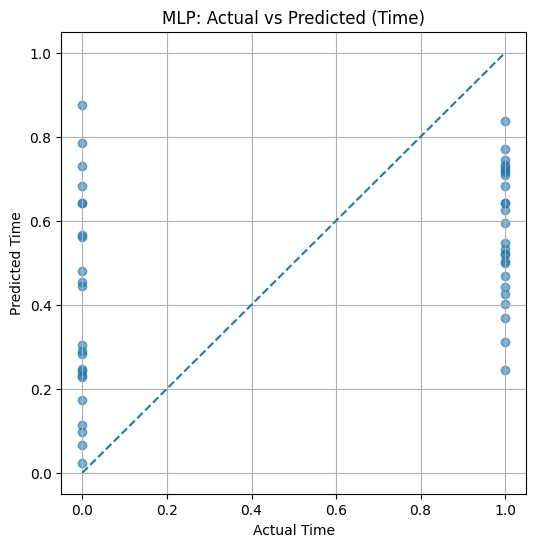

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual Time")
plt.ylabel("Predicted Time")
plt.title("MLP: Actual vs Predicted (Time)")
plt.grid(True)
plt.show()


In [ ]:
X_cols = [
    'Political_Risk',
    'Financial_capacity',
    'Project_Financing',
    'Risk_allocation',
    'PPP_Procurement',
    'Partnership_collabration',
    'Outcome_specification',
    'concession_period'
]


In [ ]:
outcomes = [
    'Time',
    'Cost',
    'Quality',
    'Financial_Viability',
    'Contract_compliance',
    'Smart_Innovation'
]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

def run_mlp(df, X_cols, y_col):
    X = df[X_cols].apply(pd.to_numeric, errors='coerce')
    y = pd.to_numeric(df[y_col], errors='coerce')

    data = pd.concat([X, y], axis=1).dropna()
    X = data[X_cols]
    y = data[y_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)

    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_s.shape[1],)),
        Dropout(0.25),
        Dense(16, activation='relu'),
        Dropout(0.25),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    model.fit(
        X_train_s, y_train,
        validation_split=0.2,
        epochs=300,
        batch_size=16,
        callbacks=[es],
        verbose=0
    )

    pred = model.predict(X_test_s).flatten()

    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)

    return mse, mae


In [ ]:
results = {}

for outcome in outcomes:
    mse, mae = run_mlp(df, X_cols, outcome)
    results[outcome] = {'MSE': mse, 'MAE': mae}

results


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


{'Time': {'MSE': 0.21185814075927295, 'MAE': 0.4207594805226034},
 'Cost': {'MSE': 0.2208421312117804, 'MAE': 0.4265415089166894},
 'Quality': {'MSE': 0.32896210800516085, 'MAE': 0.4652047030323622},
 'Financial_Viability': {'MSE': 0.575449592531064, 'MAE': 0.3874315291034932},
 'Contract_compliance': {'MSE': 0.03269217772227786,
  'MAE': 0.13644930916611028},
 'Smart_Innovation': {'MSE': 0.13777197759432047, 'MAE': 0.3062288384048306}}

In [ ]:
import pandas as pd

X_cols = [
    'Political_Risk',
    'Financial_capacity',
    'Project_Financing',
    'Risk_allocation',
    'PPP_Procurement',
    'Partnership_collabration',
    'Outcome_specification',
    'concession_period'
]

outcomes = [
    'Time',
    'Cost',
    'Quality',
    'Financial_Viability',
    'Contract_compliance',
    'Smart_Innovation'
]

# Code to generate results, moved from a previous cell to ensure it's defined.
results = {}
for outcome in outcomes:
    mse, mae = run_mlp(df, X_cols, outcome)
    results[outcome] = {'MSE': mse, 'MAE': mae}

mlp_results_df = pd.DataFrame(results).T
mlp_results_df

NameError: name 'run_mlp' is not defined

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PPP_QCA_FINAL_FUZZY.csv to PPP_QCA_FINAL_FUZZY.csv


In [ ]:
X_cols_fuzzy = [
    'f_Political_Risk',
    'f_Financial_capacity',
    'f_Project_Financing',
    'f_Risk_allocation',
    'f_PPP_Procurement',
    'f_Partnership_collabration',
    'f_Outcome_specification',
    'f_concession_period'
]

y_col_fuzzy = 'f_Contract_compliance'


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def run_mlp(df, X_cols, y_col):
    # Split
    X = df[X_cols]
    y = df[y_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Scale
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Model
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

    # Evaluation
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return {"MSE": mse, "MAE": mae}
